this is a visualizer of the velocities of each pose
* first it takes positions from YOLO-v11-pose
* these postions are the pixel locations x,y for each body part
* calculate the velocity by subtracting frame by previous frame
* normalize the velcotity from 0 to 1
* then visulize for the video


In [57]:
import json
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [58]:
# positions from YOLO-v11-pose data = [gesture, body part, (x,y)]
with open("pose_data.json") as f:
    data = json.load(f)

In [59]:
def get_velocity(data, vid_index):
    '''
    calculate the velocity by subtracting frame by previous frame
    :param data:
    :param vid_index:
    :return:
    '''
    velocities = []
    for frame_num in range(len(data[vid_index]) - 1):
        velocity = np.array(data[vid_index][frame_num + 1]['keypoints']) - np.array(data[vid_index][frame_num]['keypoints'])
        velocities.append(velocity)
    return np.array(velocities)

In [60]:
def normalize_velocity(velocities):
    '''
    normalize the velcotity from 0 to 1
    :param velocities:
    :return:
    '''

    vel = velocities.astype(float).copy()
    max_xy = np.abs(vel[..., :2]).max(axis=(0, 1))
    max_xy = np.maximum(max_xy, 1e-8)
    vel[..., :2] = vel[..., :2] / max_xy.reshape((1, 1, 2))
    return vel

In [61]:
def update(frame):
    quiver.set_UVC(velocities[frame,:,-1], vel_norm[frame,:,1])
    return quiver,

In [62]:
velocities = get_velocity(data, 2)

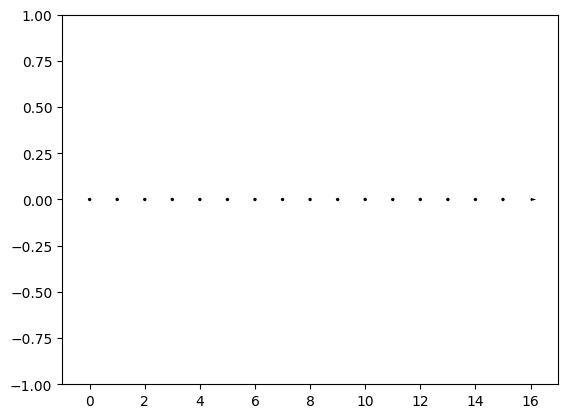

In [63]:
vel_norm = normalize_velocity(velocities)
fig, ax = plt.subplots()
ax.set_xlim(-1, 17)
ax.set_ylim(-1, 1)
quiver = ax.quiver(vel_norm[0,:,0], vel_norm[0,:,1], angles='xy', scale_units='xy', scale=1)

In [64]:
ani = FuncAnimation(fig, update, frames=len(vel_norm), blit=False, interval=100)
HTML(ani.to_jshtml())